<img src='./fig/vertical_COMILLAS_COLOR.jpg' style= 'width:70mm'>
<h1 style='font-family: Optima;color:#ecac00'>
Máster en Big Data. Tecnología y Analítica Avanzada (MBD).
<a class="tocSkip">
</h1>

<h1 style='font-family: Optima;color:#ecac00'>
Fundamentos Matemáticos del Análisis de Datos (FMAD). 2022-2023.
<a class="tocSkip">
</h1>

<h1 style='font-family: Optima;color:#ecac00'>
Resúmenes examen Unidad 5
<a class="tocSkip">    
</h1> 

# Imports section

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as scp
import seaborn as sns
import scipy.stats as stats

#sns.set(rc={'figure.figsize':(12, 8.5)})
sns.set()

# Teorema central del límite y distr normal

In [22]:
stats.norm.cdf(0.995) # El 99,5% de las muestras van a dar intervalos que vengan de la región -2.57-2.57
# ppf -> Cola izquierda
# cdf -> Cola derecha

0.840131867824506

+ **Ejemplo:** Una muestra de una población **normal** tiene estos *valores muestrales*:
$$
n = 100,\quad \bar X = 7,34,\quad  s= 0,31
$$ (Todos estos datos los podemos sacar de la muestra en caso de que nos la den)

Dejemos que $cl = 0,95$ (por tanto $\alpha = 1- cl = 0,05$). Utilicemos estos valores para obtener un intervalo de confianza del 95% para la media $\mu$ de la población de la que procede esta muestra. Comenzamos utilizando Python para encontrar el punto crítico
$$z_{alpha/2} = z_{0.025}$$

In [23]:
cl = 0.95
alpha = 1 - cl # both tails
print("The two tails should add up to: {:.3}".format(alpha))
prob_1_tail = alpha / 2 # esto me da el alpha "de la derecha"
print("Therefore each tail has probability = {:.3}".format(prob_1_tail))
print("But the ppf function in NumPy works with the left tail and so we ") 
print("need to find the probability of the left tail of the critical point, which is")
prob_left_tail_crit_point = 1 - prob_1_tail
print("{:.3}".format(prob_left_tail_crit_point))
print("Now we can use ppf to find the critical point for this confidence level:")
crit_point = stats.norm.ppf(prob_left_tail_crit_point, loc = 0, scale = 1)
print("{:.6}, approximately  {:.3}".format(crit_point, crit_point))
print("Alternative using the inverse survival function:")
crit_point = stats.norm.isf(prob_1_tail, loc = 0, scale = 1)
print("{:.6}, approximately  {:.3}".format(crit_point, crit_point))

The two tails should add up to: 0.05
Therefore each tail has probability = 0.025
But the ppf function in NumPy works with the left tail and so we 
need to find the probability of the left tail of the critical point, which is
0.975
Now we can use ppf to find the critical point for this confidence level:
1.95996, approximately  1.96
Alternative using the inverse survival function:
1.95996, approximately  1.96


In [ ]:
# Una vez calculado el punto crítico, podemos calcular los intervalos de confianza
n = 100
barX = 7.34
s = 0.31

# Cálculo rápido del punto crítico:
cl = 0.95
alpha = 1 - cl
crit_point = stats.norm.isf(alpha/2, loc = 0, scale = 1)
# Formula de los intervalos de confianza (x barra +- crit_point*var/raiz de n)
conf_int = barX + np.array([-1, 1]) * crit_point * s / np.sqrt(n)
print("The confidence interval is ", conf_int)
print("Rounded to 4 digits: [{:.4}, {:.4}]".format(conf_int[0], conf_int[1]))

### Calcular el tamaño de la muestra sabiendo el error que queremos tener
+ **Ejemplo:** Deseamos estimar el diámetro medio de algunas piezas de maquinaria producidas en una fábrica. Suponemos que el diámetro de esas piezas sigue de forma muy aproximada una distribución normal. Un experimento piloto concluyó que la desviación estándar del diámetro de las piezas era $s = 1,3$mm. Los responsables de la fábrica requieren una estimación del diámetro con un error no superior a $0,1$mm y un nivel de confianza de $99\%.$ ¿Qué tamaño de muestra necesitamos para alcanzar ese objetivo?  
Pues queremos $\delta=0,1$mm y $nc=0,99$. Utilicemos Python para obtener el valor crítico necesario y el tamaño mínimo de la muestra: 

In [29]:
# Cuando es una distribución aproximadamente normal, podemos cambiar sigma por s y no estará mal, son equivalentes
delta = 0.1
s = 1.3
# Para sacar s, sacariamos una mustra pequeña del conjunto de datos (aleatoria), y calcularíamos la varianza

# Critical point computation:
cl = 0.99
alpha = 1 - cl
crit_point = stats.norm.isf(alpha/2, loc = 0, scale = 1)
print("The critical point for cl = ",cl, " is approx. {:.4}".format(crit_point))

# formula del tamaño de la miestra
min_sample_size = np.ceil((crit_point * s / delta)**2)
print("The minimum sample size is at least n = ", min_sample_size.astype(int), 
      "(but possibly bigger).")

The critical point for cl =  0.99  is approx. 2.576
The minimum sample size is at least n =  1122 (but possibly bigger).


# T de Student

+ **Ejemplo(S05-003):** sospechamos que las aguas de un embalse tienen niveles de $NO_2$ superiores al umbral de seguridad para la vida acuática. Para estudiar este problema comprobamos la concentración de agua de $NO_2$ (mg/l) en 10 puntos diferentes al azar del embalse y obtenemos estos valores:  
```
        0.04, 0.05, 0.03, 0.06, 0.04, 0.06, 0.07, 0.03, 0.06, 0.02
```        
Utiliza `scipy.stats.t` y encuentra un intervalo de nivel de confianza del 95% para la concentración media de $NO_2$ en el agua del embalse. El nivel de peligro de $NO_2$ es de 0,03mg/l. ¿Cuál es su conclusión?

In [47]:
data = np.array([0.04, 0.05, 0.03, 0.06, 0.04, 0.06, 0.07, 0.03, 0.06, 0.02])

n = len(data)
cl = 0.95
# para el pto crítico
alpha = 1 - cl
dof = n - 1

# para int de confianza
barX=data.mean()
s = data.std()

# Critical point computation with the Student's T:
cl = 0.95
alpha = 1 - cl

# Usamos t en vez de norm para cambiar la distribución que usamos
# sin loc y scale, eso es solo para la normal, decirle que está centrada
crit_point = stats.t.isf(alpha/2, df=dof)
print(f"Punto crítico calculado para la T de Student: {crit_point}")

conf_int = barX + np.array([-1, 1]) * crit_point * s / np.sqrt(n)
print("The confidence interval is ", conf_int)
print("Rounded to 4 digits: [{:.4}, {:.4}]".format(conf_int[0], conf_int[1]))

Punto crítico calculado para la T de Student: 2.2621571627409915
The confidence interval is  [0.03482577 0.05717423]
Rounded to 4 digits: [0.03483, 0.05717]


## Intervalos de confianza en varianza (Chi2)

+ **Ejemplo (S05-005):** una variable aleatoria $X$ se distribuye normalmente. Una muestra aleatoria de $n= 7$ valores de $X$ tiene $s^2 = 62$. Utiliza Python para encontrar un intervalo de nivel de confianza del 95% para la varianza $\sigma^2$ de $X$.

In [65]:
n = 7
s2 = 62
dof = n - 1

# Niveles de confianza
cl = 0.95
alpha = 1 - cl

# Tenemos que calcular dos puntos, uno por cola (no hay simetría)
crit_point_left = stats.chi2.ppf(alpha/2, df = dof) # ppf, cola izquierda
crit_point_right = stats.chi2.isf(alpha/2, df = dof) # isf, cola derecha

# Intervalos de confianza
# Hay que tener cuidado porque nos puede salir al reves (mayor, menor).
# No pasa nada, se prueba y si sale al revés se cambia. Intervalo normal (menor, mayor)
# Formula for the confidence interval
conf_int = dof * s2 / np.array([crit_point_left, crit_point_right])
print("The confidence interval is [{:.4}, {:.4}]".format(conf_int[1], conf_int[0]))

# El de arriba nos da la varianza al cuadrado (Según la formula).
# Dependiendo de lo que nos pidan deberemos hacer la raíz. 
# La varianza suele ser al cuadrado así que este paso no hace falta
#conf_int_sigma = np.sqrt(conf_int)
#print(conf_int_sigma)

The confidence interval is [25.75, 300.6]


# Gráficos
Pintar puntos de varias muestras de una población, indicando la media poblacional y la media muestral de cada una de ellas para ver "cómo de buena" es la muestra

[0, 0] [-1, 21]


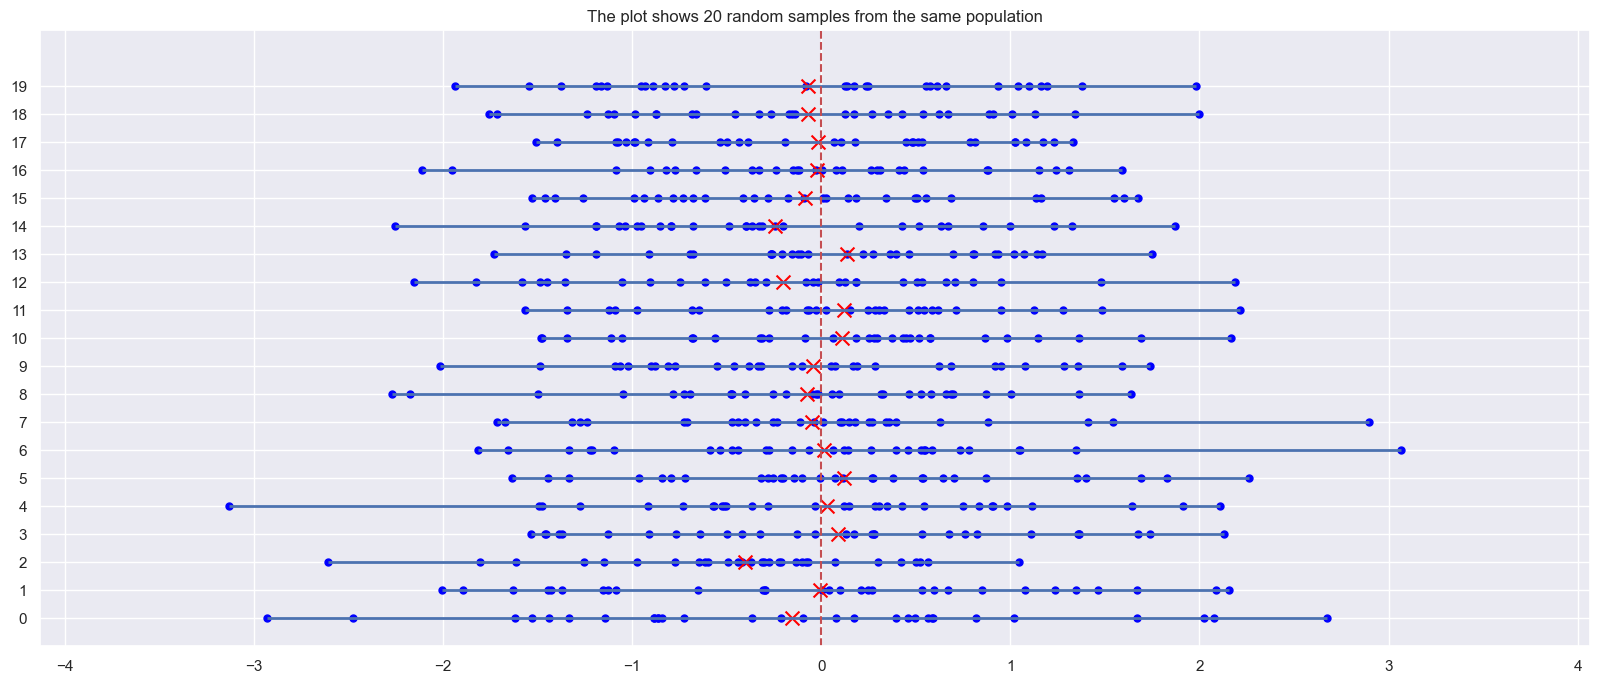

-0.04014053623907557

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as scp
import seaborn as sns

#sns.set(rc={'figure.figsize':(12, 8.5)})
sns.set()

# Initialize the random number generator
rng = np.random.default_rng(2022)

# Generamos nuestras muestras aleatorias
x = rng.normal(size = (20, 30))

# calculamos el min/max/media de todas las muestras .
# apply_along_axis= para aplicar la funcion en el eje x
# np.arange(20) = para numerar las filas (está creando un df)
x_mins = np.array([np.apply_along_axis(func1d = np.min, axis=1, arr=x), np.arange(20)]).T
x_maxs = np.array([np.apply_along_axis(func1d = np.max, axis=1, arr=x), np.arange(20)]).T
x_means = np.array([np.apply_along_axis(func1d = np.mean, axis=1, arr=x), np.arange(20)]).T
#print(x_mins)

# inicializa 20 matrices de 4 ceros.
x_ranges = np.zeros((20, 2, 2))
# compone la matriz con los minimos y los maximos para cada muestra
x_ranges[:, 0, :] = x_mins
x_ranges[:, 1, :] = x_maxs
#print(x_ranges)
#print(x_ranges[:, :, 0])

x_points = np.zeros((600, 2))

# flatten para poner el array en una única dimension (600 filas, 2 columnas)
# La primera columna representa los puntos de la muestra (tomada al principio)
# La segunda columna numera cada muestra 0-20 30 veces, para saber de qué muestra son los puntos
x_points[:, 0] = x.flatten()
x_points[:, 1] = np.repeat(np.arange(20), 30)
#print(x_points.shape)

sns.set(rc={'figure.figsize':(20, 8)})
from matplotlib.collections import LineCollection
# compone los segmentos con los rangos caluclados antes
line_segments = LineCollection(x_ranges, linewidths=2, linestyle='solid')
fig, ax = plt.subplots()
# fija maximos y minimos de los ejes
ax.set_xlim(x_mins[:, 0].min()-1, x_maxs[:, 0].max() + 1)
ax.set_ylim(-1, 21)
ax.add_collection(line_segments)
ax.set_title('The plot shows 20 random samples from the same population')
# Pinta los puntos de cada una de las muestras 
plt.scatter(x = x_points[:,0], y=x_points[:, 1], marker="o", c="blue", s=25)
# pinta las cruces con las medias
plt.scatter(x = x_means[:,0], y=x_means[:, 1], marker="x", c="red", s=100)
x1, y1 = [0, 0], [-1, 21]
# pinta la linea de puntos del centro de la muestra
plt.plot(x1, y1, "--r")
plt.yticks(range(20)) 
plt.show()        
x_points[:, 0].mean()


    variable     value
0         x1 -0.000528
1         x1 -0.274901
2         x1 -0.139286
3         x1  1.984686
4         x1  0.282109
..       ...       ...
995       x2  5.875711
996       x2  2.159877
997       x2  3.527230
998       x2  1.577861
999       x2  1.635754

[1000 rows x 2 columns]


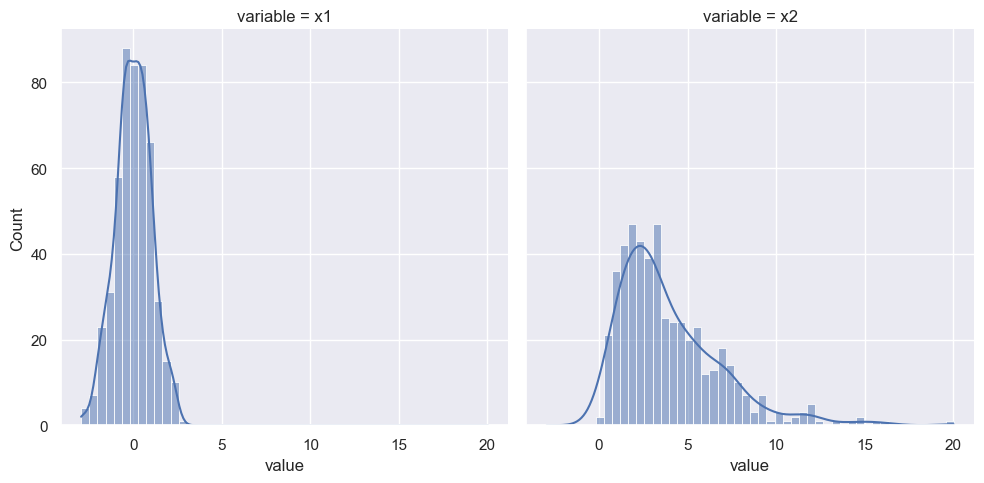

In [74]:
# Diferencia entre variables con distr normal (x1) y no normal(x2)
np.random.seed(2022)
N = 500
df = pd.DataFrame({"x1":np.random.normal(size = N),
                  "x2":np.random.chisquare(df = 4, size = N)})
# Melt para "trasponer" el dataframe (cols variable valor), haciendo x1-valor... x2-valor
df_long = df.melt()
#print(df_long)

plt.rcParams['figure.figsize'] = [15, 7]
sns.displot(data = df_long, x = "value", col= "variable", kde = True, bins = 50)
plt.show()

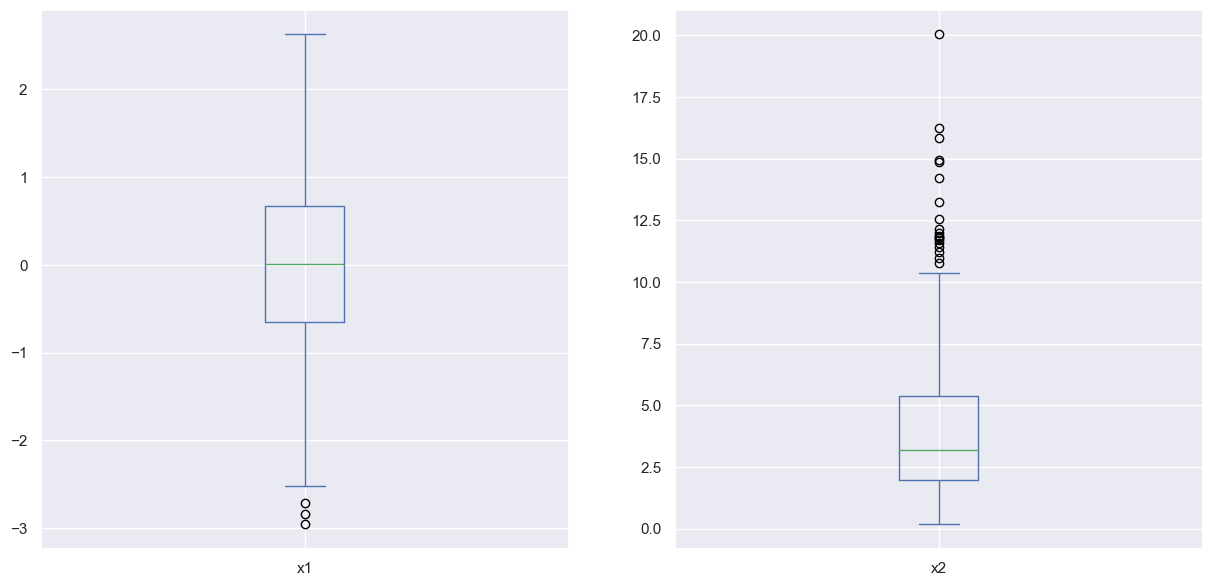

In [75]:
# Para revisar los outliers, y sobre todo la simetría
ax = df.loc[:, ["x1","x2"]].plot.box(
    subplots=True, layout=(1,2), sharex=False, sharey=False)

### QQplots
El nombre viene de "quantile vs quantile plots" porque el eje horizontal representa los cuantiles o percentiles de una normal (los valores teóricos precisos) mientras que el eje vertical contiene los percentiles empíricos de la muestra. Así, **si la muestra procede de una distribución normal, los puntos deberían caer sobre una línea**. A continuación se muestran las dos muestras que hemos utilizado (normal a la izquierda, no normal a la derecha). Este es probablemente el tipo de gráfico más utilizado para comprobar la normalidad de una muestra.

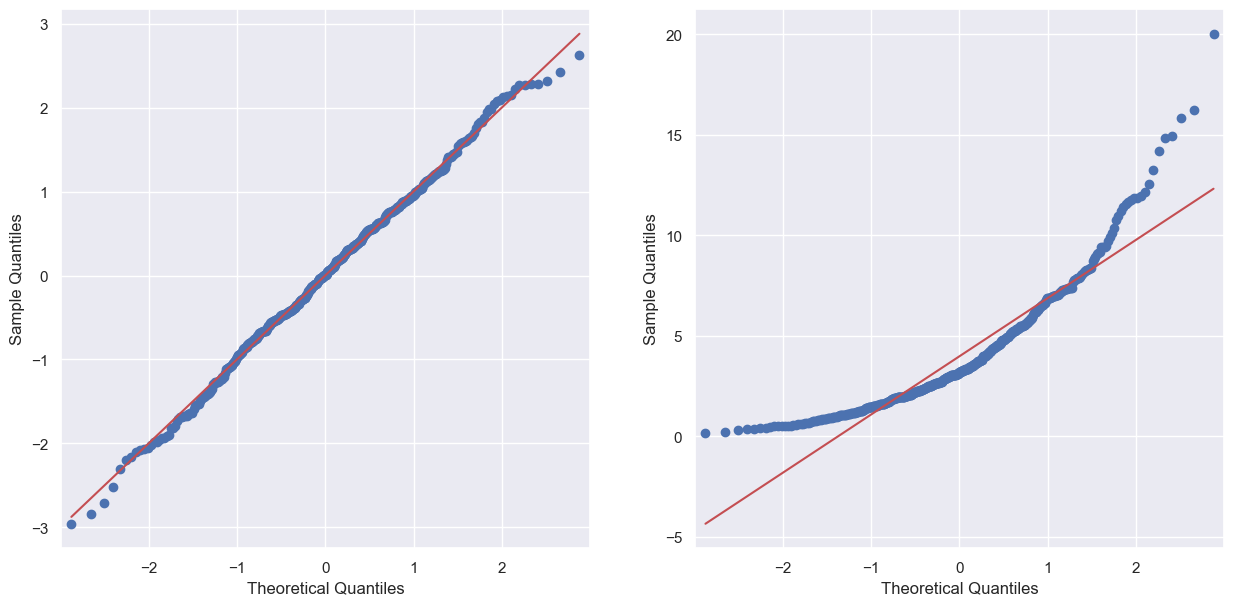

In [76]:
import statsmodels.api as sm
ax1 = plt.subplot(121)
sm.qqplot(df.x1, line="s", ax=ax1)
ax2 = plt.subplot(122)
sm.qqplot(df.x2, line="s", ax = ax2)
plt.show()

           x  sample
0  -0.000528       0
1  -0.274901       0
2  -0.139286       0
3   1.984686       0
4   0.282109       0
5   0.760809       0
6   0.300982       0
7   0.540297       0
8   0.373497       0
9   0.377813       0
10 -0.090213       1
11 -2.305943       1
12  1.142760       1
13 -1.535654       1
14 -0.863752       1
15  1.016545       1
16  1.033964       1
17 -0.824492       1
18  0.018905       1
19 -0.383344       1
20 -0.304185       2
21  0.997292       2
22 -0.127274       2
23 -1.475886       2
24 -1.940906       2


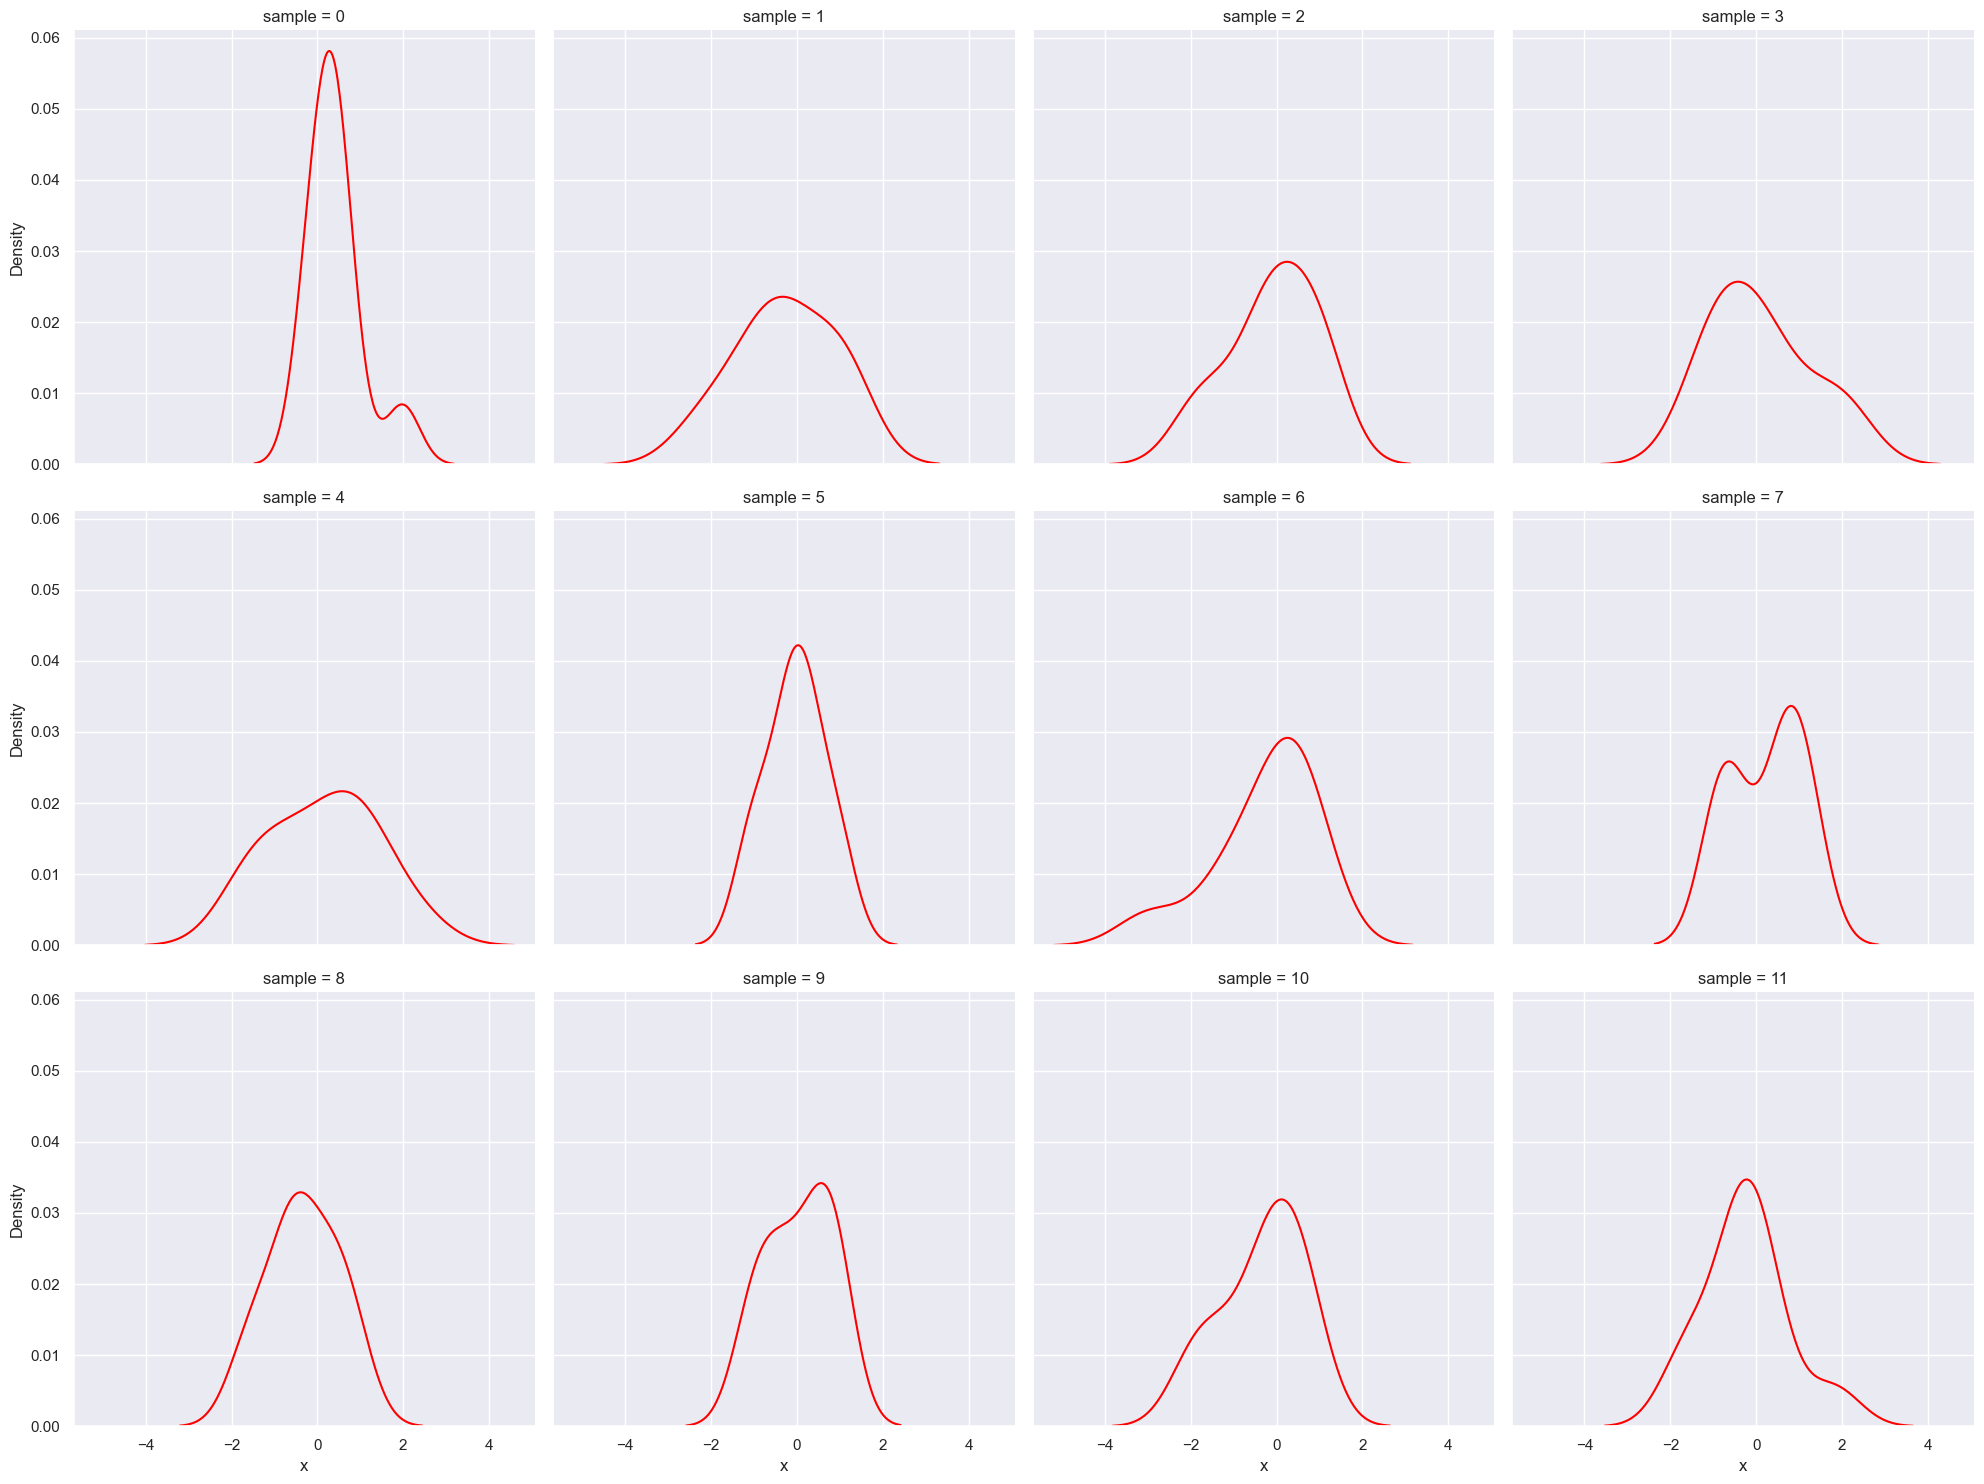

In [77]:
## Prueba de que con muestras pequeñas puede variar mucho la distribución
np.random.seed(2022)
n = 10
N = 12 

df = pd.DataFrame({"x":np.random.normal(size = N * n),
                  "sample":np.repeat(np.arange(N), n)})

print(df.head(25))
plt.rcParams['figure.figsize'] = [15, 7]
sns.displot(data = df, x = "x", col= "sample", col_wrap=4, kind="kde", color="red")
plt.show()

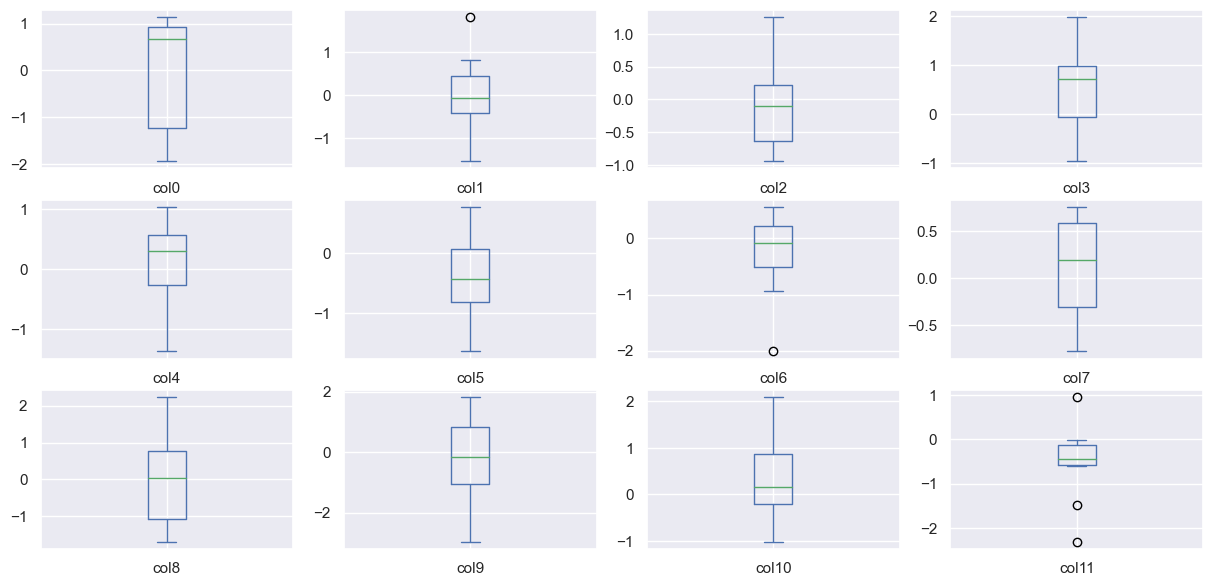

In [80]:
np.random.seed(2022)
n = 10
N = 12 

df = pd.DataFrame(np.random.normal(size = (n, N)), columns=["col" + str(_) for _ in range(N)]
                 )
df.plot.box(subplots=True, layout=(3, 4), sharex=False, sharey=False)

plt.show()

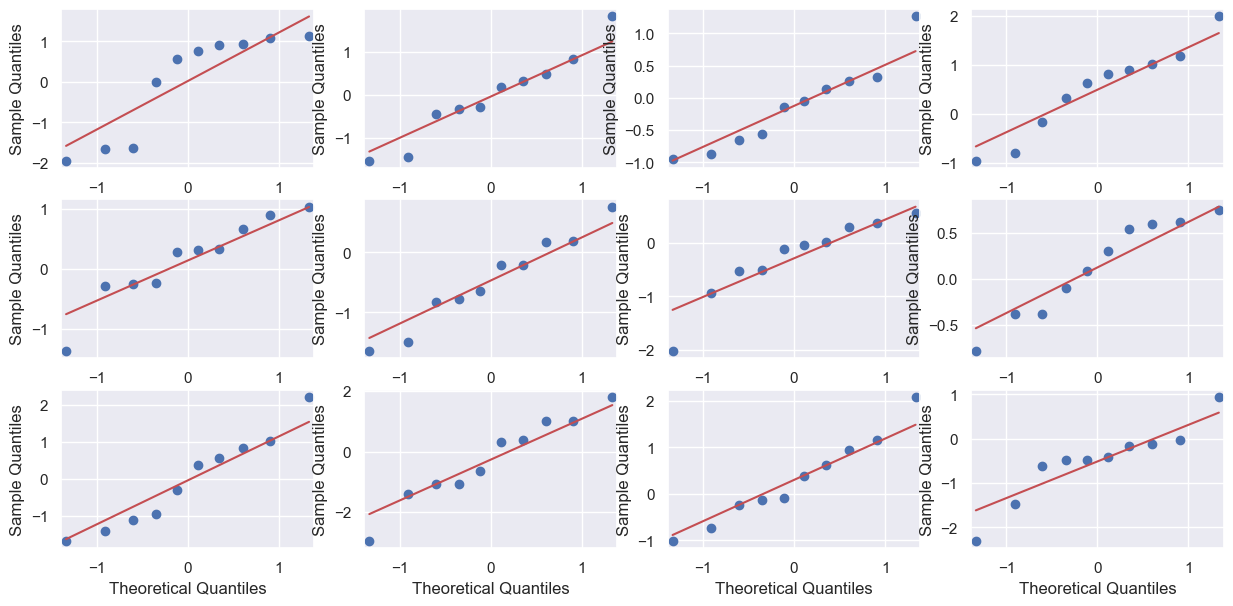

In [81]:
# Es dificil decidir sobre normalidad con tan pocos datos, usando qq plot podemos ver que no tenemos la suficiente informacion
for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    sm.qqplot(df.iloc[:, i], line="s", ax=ax)

# Ejercicios
+ **Exercise (S05-001):** Using the data in the `05-Conf_Interval_LargeSample.csv` file (you sholud already have this in your `data` subfolder of the `fmad2223` folder if you keep the repository updated) find a 95% confidence interval for the mean of the data

In [24]:
df = pd.read_csv("data/05-Conf_Interval_LargeSample.csv")
df

,x
0,4.850140
1,4.401927
2,4.644028
3,3.903355
4,4.404141
...,...
115,4.597010
116,5.083934
117,4.495165
118,4.631862


In [31]:
cl = 95
apha = 1-cl

# calculamos los datos de la media y la varianza a patir del conjunto de datos
n = df.x.size
barX = df.x.mean()
s = df.x.std()

crit_point= stats.norm.isf(alpha/2, loc = 0, scale = 1)
print("The critical point is {:.4}".format(crit_point))

# Formula del intervalo de confianza
conf_int = barX + np.array([-1, 1]) * crit_point * s / np.sqrt(n)
print("The confidence interval is [{:.4}, {:.4}]".format(conf_int[0], conf_int[1]))

The critical point is 2.576
The confidence interval is [4.357, 4.503]


+ **Ejercicio (S05-002):** En un ejercicio anterior utilizaste los datos de `05-Conf_Interval_LargeSample.csv` para obtener un intervalo de confianza para la media utilizando la muestra de ese fichero. ¿Cuál era la anchura de ese intervalo? ¿Qué tamaño de muestra necesitarías para encontrar un intervalo de confianza del 95% con una precisión $\delta = 10^{-3}$. Utilice Python para encontrar la respuesta.

In [35]:
# Ejecutar ejercicio anterior
delta = 0.001

print("??La anchura del intervalo de confianza es de: ", conf_int[1] - conf_int[0])

delta = 0.001

min_sample_size = np.ceil((crit_point * s / delta)**2) 
print("The minimum sample size is at least n = ", min_sample_size.astype(int), 
      "(but possibly bigger).")

La anchura del intervalo de confianza es de:  0.14578678076311036
The minimum sample size is at least n =  637614 (but possibly bigger).


+ **Ejercicio (S05-004):** Utilizando la variable `gear_ratio` del conjunto de datos `auto2`, encuentra un intervalo de confianza del 95% para la media de dicha variable.  

In [48]:
# Load the data set
auto2 = pd.read_stata('data/auto2.dta')
auto2.head()

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
0,AMC Concord,4099,22,Average,2.5,11,2930,186,40,121,3.58,Domestic
1,AMC Pacer,4749,17,Average,3.0,11,3350,173,40,258,2.53,Domestic
2,AMC Spirit,3799,22,NaN,3.0,12,2640,168,35,121,3.08,Domestic
3,Buick Century,4816,20,Average,4.5,16,3250,196,40,196,2.93,Domestic
4,Buick Electra,7827,15,Good,4.0,20,4080,222,43,350,2.41,Domestic


In [54]:
data = np.array(auto2.gear_ratio)

n = len(data)
dof = n - 1

cl = 0.95
alpha = 1 - cl

barX = data.mean()
s = data.std()

crit_point = stats.t.isf(alpha/2, df=dof)
print(f"Punto crítico calculado para la T de Student: {crit_point}")

conf_int = barX + np.array([-1, 1]) * crit_point * s / np.sqrt(n)
print("The confidence interval is ", conf_int)
print("Rounded to 4 digits: [{:.4}, {:.4}]".format(conf_int[0], conf_int[1]))


74
Punto crítico calculado para la T de Student: 1.9929971255321663
The confidence interval is  [2.90986824 3.11986113]
Rounded to 4 digits: [2.91, 3.12]


+ **Ejercicio (S05-006):** Utiliza Python para encontrar un intervalo de nivel de confianza del 95% para la varianza $\sigma^2$ de
la variable `gear_ratio` del conjunto de datos `auto2

In [69]:
data = np.array(auto2.gear_ratio)

n = len(data)
dof = n - 1

cl = 0.95
alpha = 1 - cl

s = data.std()

# Calculamos los puntos críticos
crit_point_left = stats.chi2.ppf(alpha/2, df = dof) # cola izq
crit_point_right = stats.chi2.isf(alpha/2, df = dof) # cola der
print(crit_point_left, crit_point_right)

# Buscamos el intervalo de confianza
conf_int = dof * s**2 / np.array([crit_point_left, crit_point_right])
print("The confidence interval is [{:.4}, {:.4}]".format(conf_int[1], conf_int[0]))

51.26481327342183 98.51626201156778
The confidence interval is [0.1522, 0.2925]
